# Q1. K-means

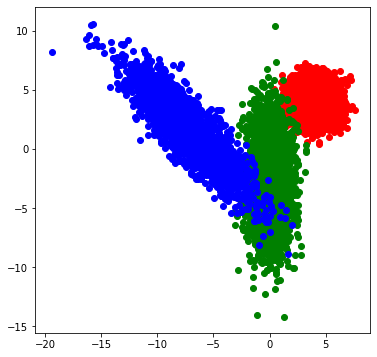

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov  4 19:05:41 2020

@author: TiffanyHsiao
"""
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import pdb
# mean shifting
G1_x = np.random.normal(4, 1, (5000,))
G1_y = np.random.normal(4, 1, (5000,))
G1 = np.concatenate((G1_x.reshape(-1,1), G1_y.reshape(-1,1)), axis =1)

G2_x = np.random.normal(0, 1, (3000,))
G2_y = np.random.normal(-3, 3, (3000,))
G2 = np.concatenate((G2_x.reshape(-1,1), G2_y.reshape(-1,1)), axis =1)

G3_x = np.random.normal(-4, 1, (2000,))
G3_y = np.random.normal(6, 4, (2000,))
G3 = np.concatenate((G3_x.reshape(-1,1), G3_y.reshape(-1,1)), axis =1)

cos45 = math.cos(-45/180*math.pi)
sin45 = math.sin(-45/180*math.pi)
R = [[cos45, -sin45], [sin45, cos45]]
G3 = G3.dot(R)

G = np.concatenate((G1, G2, G3))
#%%
plt.figure(figsize=(6,6))
plt.scatter(G1_x, G1_y, c = 'r')
plt.scatter(G2_x, G2_y, c='g')
plt.scatter(G3[:,0], G3[:,1], c='b')

plt.show()



10000
21


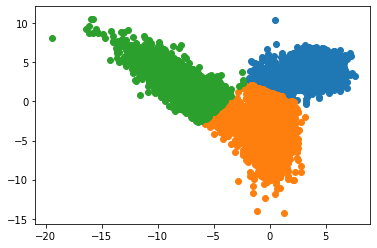

0

In [81]:
#%%
def kmeans(sample, K, maxiter):
    N = sample.shape[0] # num of data
    print(N)
    D = sample.shape[1] # dimensions
    L = np.zeros((N, 1)) # label
    L1 = np.zeros((N, 1)) # label restore -> if same, converge
    dist = np.zeros((N,K)) # store distance of (sample - center) 
    idx = random.sample(range(N), K)
    C = sample[idx,:] # random select a sample as center
    # pdb.set_trace()
    iter = 0
    
    while(iter< maxiter):
        for i in range(K): # iterat each center
            dist[:,i] = np.sum((sample - np.tile(C[i,:], (N,1)))**2, axis = 1) # sum up x_dist^2 and y_dist^2 
        L = np.argmin(dist,1)
        if(np.array_equal(L1, L)): break
        L1 = L
        
        # find new C: by finding mean of a new calculated group
        for i in range(K):
            idx = np.nonzero(L == i)[0]
            # pdb.set_trace()
            if(len(idx) > 0):
                C[i,:] = np.mean(sample[idx, :], 0)
            iter += 1
        
    print(iter)
    return C, L


def plot_labels(GC, GL, G):
    
    idx = np.nonzero(GL==0)[0]
    GG1 = G[idx, :]

    idx = np.nonzero(GL==1)[0]
    GG2 = G[idx, :]

    idx = np.nonzero(GL==2)[0]
    GG3 = G[idx, :]

    plt.scatter(GG1[:,0], GG1[:,1,])
    plt.scatter(GG2[:,0], GG2[:,1,])
    plt.scatter(GG3[:,0], GG3[:,1,])
    plt.show()
    return 0 

GC, GL = kmeans(G, 3, 100)
plot_labels(GC, GL, G)


# Q2 KNN

In [12]:
import collections
from sklearn import datasets
iris = datasets.load_iris()

x = iris.data
y = iris.target

x1 = x[:149, :]
y1 = y[:149]
x2 = x[149:, :]

def knn(test,train,target,K):
    N = train.shape[0]
    dist = np.sum((train - np.tile(test, (N, 1)))**2, 1) # get 149 distances
    idx = sorted(range(len(dist)), key = lambda i: dist[i])[0:K] # sort distance
    return collections.Counter(target[idx]).most_common(1)[0][0]

print(knn(x2, x1, y1, 10)) # 10: decide based on 10 nearest neighbors

2


# hw6= Q1

# preprocessing

150
51
150
18
150
12


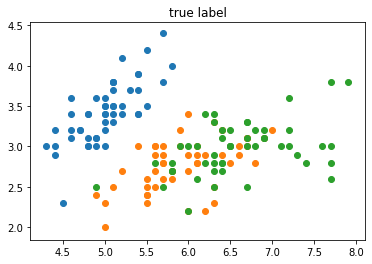

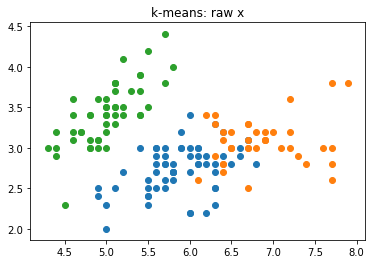

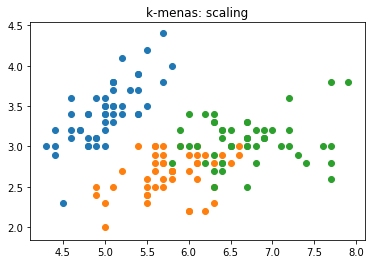

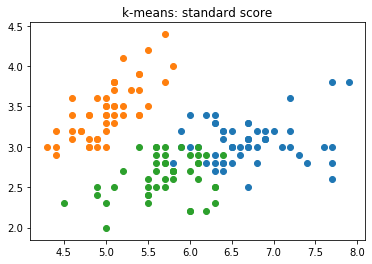

0

In [96]:
x_min = x.min(axis=0)
x_max = x.max(axis=0)
x_mean = x.mean(axis=0)
x_std = x.std(axis=0)

# scaling (minmax)
nom = x - np.tile(x_min, (x.shape[0], 1))
denom = x_max - x_min
x_scaling = nom / denom

# standard score
nom = x - np.tile(x_mean, (x.shape[0], 1))
x_ss = nom / x_std

x_GC, x_GL = kmeans(x, 3, 100)
x_scalingGC, x_scalingGL = kmeans(x_scaling, 3, 100)
x_ssGC, x_ssGL = kmeans(x_ss, 3, 100)

plt.title('true label')
plot_labels(0, y, x)
plt.title('k-means: raw x')
plot_labels(x_GC, x_GL, x)
plt.title('k-menas: scaling')
plot_labels(x_scalingGC, x_scalingGL, x)
plt.title('k-means: standard score')
plot_labels(x_ssGC, x_ssGL, x)

In [92]:
confusion_x = np.zeros((3,3))
confusion_xscaling = np.zeros((3,3))
confusion_xss = np.zeros((3,3))
for i in range(x.shape[0]):
    confusion_x[x_GL[i], y[i]] += 1
    confusion_xscaling[x_scalingGL[i], y[i]] += 1
    confusion_xss[x_ssGL[i], y[i]] += 1


np.concatenate((x_GL.reshape(-1,1), y.reshape(-1,1)), axis = 1)

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [2, 1],
       [0, 1],
       [2, 1],
       [2, 1],
       [2, 1],
       [2, 1],
       [2, 1],
       [2, 1],
       [2, 1],
       [2, 1],
       [2, 1],
       [2, 1],
       [2, 1],
       [2, 1],
       [2, 1],
       [2,

In [98]:
print('k-means: raw x')
print(confusion_x)
print('k-means: scaling')
print(confusion_xscaling)
print('k-means: standard score')
print(confusion_xss)

k-means: raw x
[[ 0.  3. 36.]
 [50.  0.  0.]
 [ 0. 47. 14.]]
k-means: scaling
[[ 0. 10. 42.]
 [ 0. 40.  8.]
 [50.  0.  0.]]
k-means: standard score
[[ 0. 38. 14.]
 [50.  0.  0.]
 [ 0. 12. 36.]]


# hw6- Q2

In [31]:
confusion_1 = np.zeros((3,3))
confusion_10 = np.zeros((3,3))
# print(confusion)
for i in range(x.shape[0]):
    x2 = x[i, :]
    y2 = y[i, ]
    x1 = np.delete(x, i, 0)
    y1 = np.delete(y, i, 0)
    
    confusion_1[knn(x2, x1, y1, 1),y2] += 1 
    confusion_10[knn(x2, x1, y1, 10),y2] += 1 

    
print(confusion_1)
print(confusion_10)

[[50.  0.  0.]
 [ 0. 47.  3.]
 [ 0.  3. 47.]]
[[50.  0.  0.]
 [ 0. 46.  3.]
 [ 0.  4. 47.]]


[[50.  0.  0.]
 [ 0. 47.  3.]
 [ 0.  3. 47.]]


(149,)